In [137]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.discrete.discrete_model

In [91]:
df = pd.read_excel('Т9 Семинар 1 неделя.xlsx', decimal = ',')
df = df.drop(df.columns[[0, 3, 4, 5]], axis = 1)
df = df.rename(columns = {df.columns[0] : 'Y', df.columns[1] : 'X'})
df.head()

,Y,X
0,175.8,156.5
1,258.7,226.7
2,164.5,107.5
3,180.2,156.2
4,175.5,175.6


In [15]:
prod = 1 
for i in range(len(df)):
    prod = prod * df['Y'][i]
prod

1.8381334580709637e+88

In [29]:
prod1 = 0
df1 = df.copy()
df1['Y'] = np.log(df1['Y'])
for i in range(len(df1)):
    prod1 = prod1 + df1['Y'][i]
prod1

203.23623881525828

In [30]:
y_geom_data = prod ** (1/len(df))
y_geom_data

210.2552090571997

In [32]:
y_geom_data1 = np.exp(1/len(df1) * prod1)
y_geom_data1

210.25520905719992

In [34]:
df['Y_new']=df['Y']/y_geom_data
df1['Y_new']=np.log(df['Y']/y_geom_data1)

In [35]:
df['const']=1
df1['const']=1

In [37]:
result = sm.OLS(df['Y_new'], df[['const', 'X']]).fit()
result1 = sm.OLS(df1['Y_new'], df1[['const', 'X']]).fit()

In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_new   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           3.23e-13
Time:                        12:46:03   Log-Likelihood:                 35.742
No. Observations:                  38   AIC:                            -67.48
Df Residuals:                      36   BIC:                            -64.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5003      0.049     10.204      0.000       0.401       0.600
X              0.0032      0.000     11.138      0.000       0.003       0.004
==============================================================================
Omnibus:                        2.084   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.639
Skew:                          -0.339   Prob(JB):                        0.441
Kurtosis:                       2.241   Cond. No.                         536.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_new   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           3.37e-13
Time:                        12:46:15   Log-Likelihood:                 39.374
No. Observations:                  38   AIC:                            -74.75
Df Residuals:                      36   BIC:                            -71.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4693      0.045    -10.532      0.000      -0.560      -0.379
X              0.0029      0.000     11.121      0.000       0.002       0.003
==============================================================================
Omnibus:                        2.146   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                2.002
Skew:                          -0.498   Prob(JB):                        0.367
Kurtosis:                       2.480   Cond. No.                         536.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
ess1=sum(result.resid**2)

In [44]:
ess2=sum(result1.resid**2)

In [48]:
z=abs(len(df)/2*np.log(ess1/ess2))
z

3.6314462306193156

In [51]:
stats.chi2.ppf(0.95,1)

3.841458820694124

Сгенерировать выборки

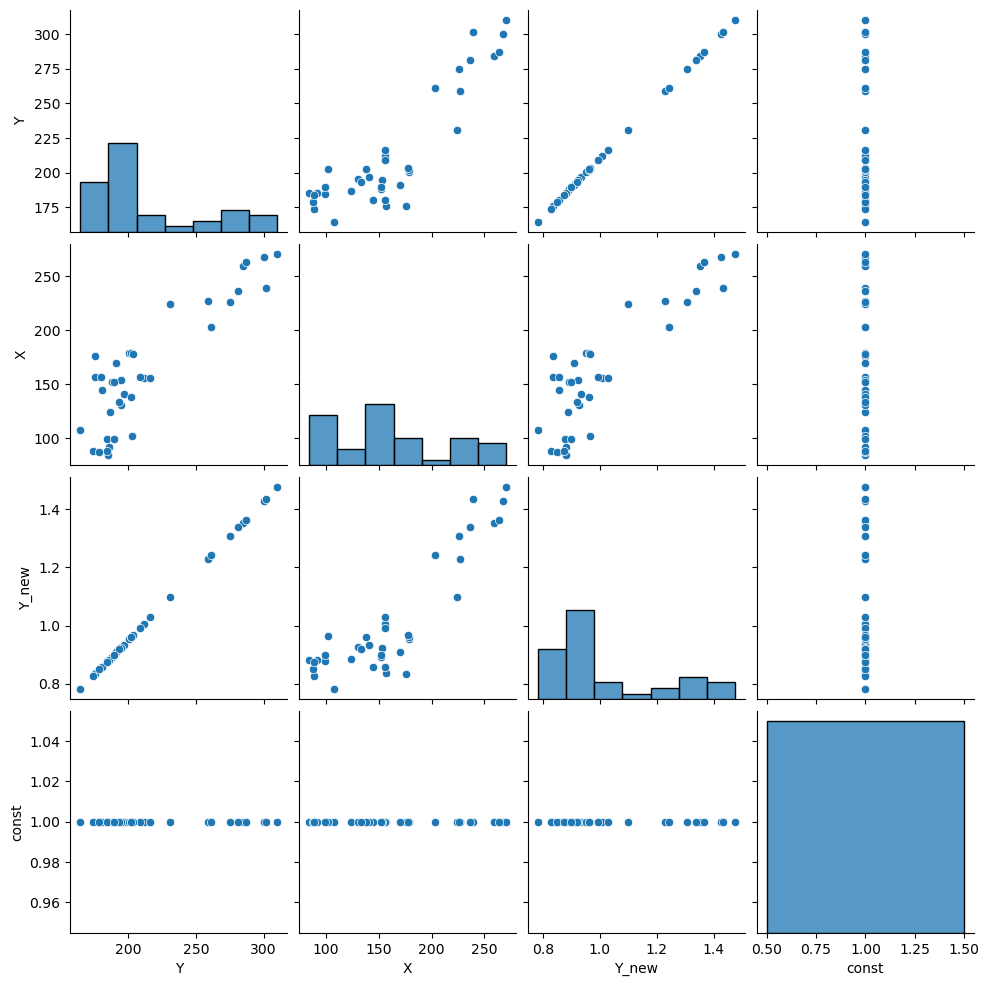

In [53]:
sns.pairplot(df) 

In [54]:
data = pd.read_excel('dataset.xlsx', decimal = ',')
data

,Y,X
0,348.367885,21.641896
1,426.943679,25.216834
2,653.120682,36.380505
3,1017.630491,33.392132
4,844.368968,32.363659
...,...,...
95,964.115940,34.368114
96,1316.759401,36.826075
97,729.212267,29.353923
98,784.387347,29.595019


Метод Зарембки

In [57]:
data1 = data.copy()
data1['Y'] =  np.log(data1['Y'])
data1

,Y,X
0,5.853259,21.641896
1,6.056652,25.216834
2,6.481762,36.380505
3,6.925232,33.392132
4,6.738590,32.363659
...,...,...
95,6.871212,34.368114
96,7.182929,36.826075
97,6.591965,29.353923
98,6.664903,29.595019


In [58]:
prod = 1 
for i in range(len(data)):
    prod = prod * data['Y'][i]
prod

4.460815936660431e+284

In [60]:
prod1 = 0
for i in range(len(data1)):
    prod1 = prod1 + data1['Y'][i]
prod1

655.4294981050481

In [61]:
y_geom_data = prod ** (1/len(data))
y_geom_data

702.2538729658678

In [62]:
y_geom_data1 = np.exp(1/len(data1) * prod1)
y_geom_data1

702.2538729658685

In [63]:
data['Y_new'] = data['Y']/y_geom_data
data1['Y_new'] = np.log(data['Y']/y_geom_data1)


In [64]:
data['const']=1
data1['const']=1

In [65]:
result = sm.OLS(data['Y_new'], data[['const', 'X']]).fit()
result1 = sm.OLS(data1['Y_new'], data1[['const', 'X']]).fit()

In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_new   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     220.1
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           8.42e-27
Time:                        13:07:18   Log-Likelihood:                -62.756
No. Observations:                 100   AIC:                             129.5
Df Residuals:                      98   BIC:                             134.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1660      0.234     -9.273      0.000      -2.630      -1.702
X              0.1115      0.008     14.837      0.000       0.097       0.126
==============================================================================
Omnibus:                       40.158   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.107
Skew:                           1.399   Prob(JB):                     1.01e-25
Kurtosis:                       7.449   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_new   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     498.3
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           3.28e-40
Time:                        13:07:24   Log-Likelihood:                -9.1706
No. Observations:                 100   AIC:                             22.34
Df Residuals:                      98   BIC:                             27.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9921      0.137    -21.889      0.000      -3.263      -2.721
X              0.0981      0.004     22.322      0.000       0.089       0.107
==============================================================================
Omnibus:                        9.619   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.197
Skew:                          -0.596   Prob(JB):                      0.00611
Kurtosis:                       4.012   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
ess1 = sum(result.resid**2)

In [69]:
ess2 = sum(result1.resid**2)

In [73]:
z = abs(len(data)/2*np.log(ess1/ess2))
z

53.58587870617597

In [74]:
stats.chi2.ppf(0.95,1)

3.841458820694124

Присутствует статистическая значимость между моделями

Метод Бокса-Кокса


In [76]:
lamda = np.arange(0.001,1,0.01)
ess_list = []

In [77]:
for i in lamda:
    data_help=data.copy()
    data_help['X']=data_help['X']**i/i
    ess_list.append(sum(sm.OLS(data['Y_new']**i/i, data_help[['const', 'X']]).fit().resid**2))

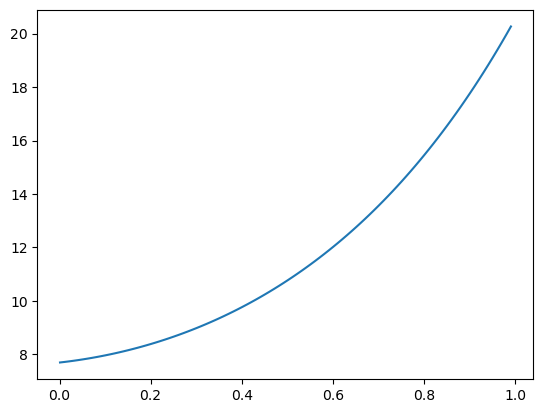

In [80]:
plt.plot(lamda, ess_list)

В данном случае мы также, как и в первом методе выбираем полулогарифмическую модель.

1. Взять датасет и провести предобработку 
2. ⁠построить логист пробит модель
3. ⁠записать спецификацию модели
4. ⁠показать качество моделей с помощью f1 метрики и accuracy
5. ⁠сравнить между собой 
6. ⁠пусть у нас чтобы объект относился к классу нужно, чтобы вероятность попадания была >= 0.7. Как изменится соотношение классов в логит и пробит

In [115]:
df = pd.read_excel('Задача Т9 Л-П модели Airline_satisfaction.xlsx')
df = df.drop(index = 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df

,On-board service,Baggage handling,Cleanliness,Arrival Delay in Minutes,Gender,satisfaction
1,1,5,1,0,1,0
2,3,5,5,0,0,0
3,1,4,3,0,0,0
4,4,4,4,0,0,1
5,2,4,2,0,1,0
6,1,1,3,14,0,0
7,1,3,2,5,0,0
8,3,3,2,0,1,0
9,2,4,4,3,1,0
10,5,4,4,0,1,1


In [100]:
df.isnull().any()

On-board service            False
Baggage handling            False
Cleanliness                 False
Arrival Delay in Minutes    False
Gender                      False
satisfaction                False
dtype: bool

Построим диаграмму и оценим выбросы

<Axes: >

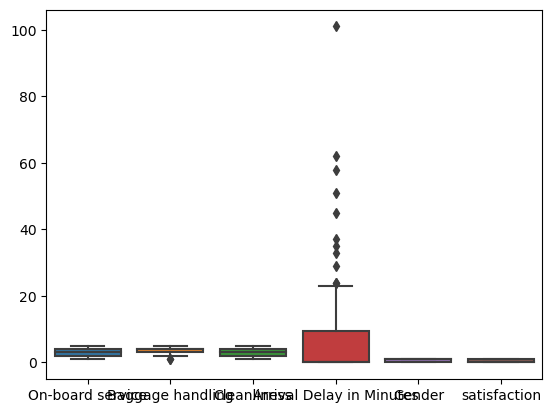

In [118]:
sns.boxplot(df)

In [122]:
df = df.apply(pd.to_numeric)

In [124]:
z = np.abs(stats.zscore(df))

df_clean = df[(z<3).all(axis=1)]
df.shape, df_clean.shape

((60, 6), (59, 6))

обнаружен 1 выброс

In [202]:
Y = df['satisfaction']
Y.head()

1    0
2    0
3    0
4    1
5    0
Name: satisfaction, dtype: int64

In [114]:
X = df[['On-board service', 'Baggage handling', 'Cleanliness', 'Arrival Delay in Minutes', 'Gender']]
X

,On-board service,Baggage handling,Cleanliness,Arrival Delay in Minutes,Gender
1,1,5,1,0,1
2,3,5,5,0,0
3,1,4,3,0,0
4,4,4,4,0,0
5,2,4,2,0,1
6,1,1,3,14,0
7,1,3,2,5,0
8,3,3,2,0,1
9,2,4,4,3,1
10,5,4,4,0,1


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [146]:
probit = statsmodels.discrete.discrete_model.Probit(y_train.astype(int), X_train.astype(int)).fit()
probit.summary()

Optimization terminated successfully.
         Current function value: 0.499126
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                   48
Model:                         Probit   Df Residuals:                       42
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Feb 2024   Pseudo R-squ.:                  0.2565
Time:                        14:39:14   Log-Likelihood:                -23.958
converged:                       True   LL-Null:                       -32.222
Covariance Type:            nonrobust   LLR p-value:                  0.005489
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4819      1.014     -2.448      0.014      -4.469      -0.494
On-board service             0.6937      0.268      2.586      0.010       0.168       1.220
Baggage handling            -0.3544      0.323     -1.096      0.273      -0.988       0.280
Cleanliness                  0.3344      0.174      1.918      0.055      -0.007       0.676
Arrival Delay in Minutes     0.0048      0.011      0.437      0.662      -0.017       0.026
Gender                       0.3050      0.428      0.712      0.476      -0.535       1.145
============================================================================================
"""

In [166]:
logit = statsmodels.discrete.discrete_model.Logit(y_train.astype(int), X_train.astype(int)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.491582
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                   48
Model:                          Logit   Df Residuals:                       42
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Feb 2024   Pseudo R-squ.:                  0.2677
Time:                        14:57:07   Log-Likelihood:                -23.596
converged:                       True   LL-Null:                       -32.222
Covariance Type:            nonrobust   LLR p-value:                  0.004047
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.5221      1.880     -2.405      0.016      -8.208      -0.836
On-board service             1.3138      0.533      2.464      0.014       0.269       2.359
Baggage handling            -0.6644      0.577     -1.152      0.249      -1.794       0.466
Cleanliness                  0.5793      0.305      1.902      0.057      -0.018       1.176
Arrival Delay in Minutes     0.0111      0.019      0.584      0.559      -0.026       0.048
Gender                       0.4370      0.728      0.600      0.548      -0.990       1.864
============================================================================================
"""

In [167]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [204]:
y_pred_prob = probit.predict(X.astype(int)) >= 0.7
accuracy_prob = accuracy_score(Y.astype(int), y_pred_prob)
f1_prob = f1_score(Y.astype(float), y_pred_prob)
accuracy_prob, f1_prob

(0.7, 0.4705882352941176)

In [203]:
y_pred_log = logit.predict(X.astype(int)) >= 0.7
accuracy_log = accuracy_score(Y.astype(int), y_pred_log)
f1_log = f1_score(Y.astype(float), y_pred_log)
accuracy_log, f1_log

(0.7, 0.4705882352941176)